In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import gradio as gr
import matplotlib.pyplot as plt

d:\Software\Anaconda\envs\workplace\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_df = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_df = train_datagen.flow_from_directory(
    'dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

In [5]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(15, activation='softmax')  # 15 classes
])

In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

In [8]:
# Model Training
history = model.fit(
    train_df,
    validation_data=validation_df,
    epochs=30,
    callbacks=callbacks
)

d:\Software\Anaconda\envs\workplace\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 43s 767ms/step - accuracy: 0.3389 - loss: 2.2444 - val_accuracy: 0.7520 - val_loss: 0.8392 - learning_rate: 5.0000e-04
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 37s 760ms/step - accuracy: 0.7442 - loss: 0.8127 - val_accuracy: 0.8198 - val_loss: 0.5716 - learning_rate: 5.0000e-04
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 774ms/step - accuracy: 0.8304 - loss: 0.5554 - val_accuracy: 0.8407 - val_loss: 0.5144 - learning_rate: 5.0000e-04
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 799ms/step - accuracy: 0.8512 - loss: 0.4733 - val_accuracy: 0.8329 - val_loss: 0.5467 - learning_rate: 5.0000e-04
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 804ms/step - accuracy: 0.8543 - loss: 0.4394 - val_accuracy: 0.8355 - val_loss: 0.5133 - learning_rate: 5.0000e-04
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 801ms/step - accuracy: 0.8689 - loss: 0.4131 - val_accuracy: 0.8251 - val_loss: 0.5762 - learning_rate: 5.0000e-04
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 805ms/step - acc

In [11]:
model.save('animal_classifier_model.h5')

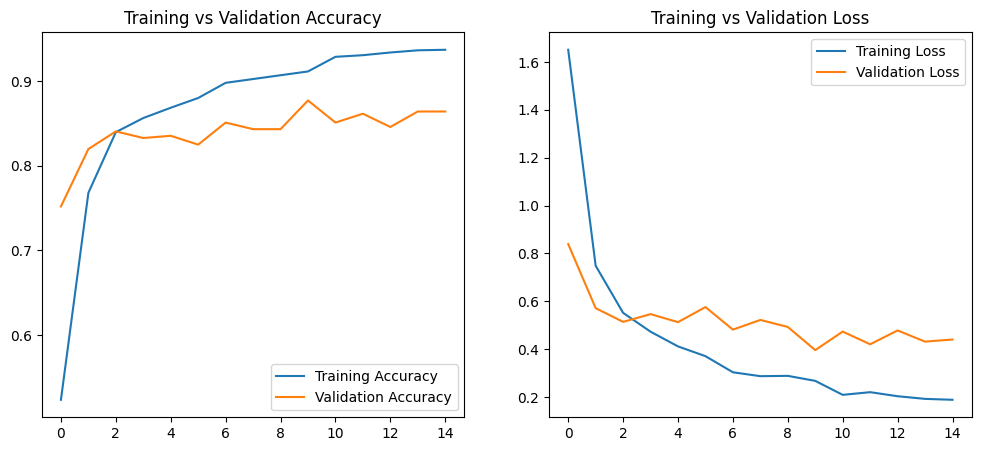

In [13]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)